<h3 style="text-align:center">Knowledge Representation and Reasoning - Project - Fall 2018 </h3>


<h1 style="text-align:center">Handwritten digit recognition using </h1> <h1 style="text-align:center"> Artificial and Convolutional Neural Networks </h1>

#### Team n°3:
AZEBA YOUSSEF <br>
DAVLETSHIN SAMAT IREKOVICH <br>
OH CHANGSUK <br>
SVEDBORG ANDERSSON FELIX JOERGEN <br>

# Project Overview

In this project, we will implement, train and test Neural Networks on Python, with different settings of hyperparameters, to solve the Handwritten Digits Recognition problem , using the MNIST dataset<br><br>

First, we will implement an Artificial Neural Network (ANN) from scratch, without using any Deep Learning library. This will allow us to understand the inner workings of Neural Networks and we will gain a better understanding of Deep Learning.<br><br>

Then, in order to get a better accuracy than the previous model, we will implement a Convolutional Neural Networks (CNN) using TensorFlow this time. Our goal will be to optimize our model to get a final accuracy of more than 99%.<br><br>

We used Google Colaboratory to share our code. It’s a free Jupyter notebook environment that runs entirely in the cloud.<br><br>

Finally, we decided to focus on handwriting recognition in our project, because it's an excellent prototype problem for learning about neural networks in general. As a prototype it hits a sweet spot: it's challenging - it's no small feat to recognize handwritten digits - but also it doesn’t require tremendous computational power. The same ideas we’ll use to solve this problem may be applied to other problems in computer vision, and also in speech, natural language processing, and other domains.

# Introduction

We will use the MNIST <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a>  dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="mnist.png" alt="Drawing" style="width: 200px;"/>
<center><span>Figure 1: MNIST digits examples</span></center>


We defined some useful functions in the following files, that we will import later:

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 



This notebook is composed of two parts: ANNs and CNNs.
for the ANN part, we will only use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Let's write some code!

In [1]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib.pyplot as plt
#to compute training time
from time import time

# Part 1: Artificial Neural Networks

## Section 1 :  A simple Neural Network

<b>Subsection 1</b>: Before designing and writing our code, we will first work on a simple neural network by hand. 
Let's consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. We will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Let's assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, we will assume that if you want to backpropagate the error on a whole batch, we will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




![ANN](NN.png)
<center><span>Figure 2: Neural network </span></center>
<br>
$(x_1,x_2)$ is the input layer.<br>
$(x_3,x_4)$ is the hidden layer.<br>
$x_5$ is the output.<br>
$x_6$ and $x_7$ are the biases.<br>







Let's compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$.

N.B: We use functions that we previously defined on utils.py: $sigmoid(x)$ and its derivative $dsigmoid(x)$.

In [2]:
lr = 5
x1, x2, x6, x7 = 0.8, 0.2, 1.0, 1.0
w13, w14, w23, w24, w63, w64 = 0.3, -0.5, 0.8, 0.2, 0.2, -0.4
w35, w45, w75 = -0.6, 0.4, 0.5
y = 0.4

u3=w13*x1+w23*x2+w63 #put b to -1
x3 =sigmoid(u3)

u4=x1*w14+w24*x2+w64
x4 = sigmoid(u4)

u5=w35*x3+w45*x4+w75 #put b to -1
x5 = sigmoid(u5)

print("=== FORWARD PASS 1 ===")
print("Output =", x5)

d_w35 = 2*(x5-y)*dsigmoid(u5)*x3
d_w45 = 2*(x5-y)*dsigmoid(u5)*x4
d_w75 = 2*(x5-y)*dsigmoid(u5)*x7

d_w13 = 2*(x5-y)*x1*w35*dsigmoid(u5)*dsigmoid(x3)
d_w14 = 2*(x5-y)*x1*w45*dsigmoid(u5)*dsigmoid(x4)
d_w23 = 2*(x5-y)*x2*w35*dsigmoid(u5)*dsigmoid(x3)
d_w24 = 2*(x5-y)*x2*w45*dsigmoid(u5)*dsigmoid(x4)
d_w63 = 2*(x5-y)*x6*w35*dsigmoid(u5)*dsigmoid(x3)
d_w64 = 2*(x5-y)*x6*w45*dsigmoid(u5)*dsigmoid(x4)

w13 = w13- lr*d_w13
w14 -= lr*d_w14
w23 -= lr*d_w23
w24 -= lr*d_w24
w63 -= lr*d_w63
w64 -= lr*d_w64
w35 -= lr*d_w35
w45 -= lr*d_w45
w75 -= lr*d_w75

print("=== BACKWARD PASS ===")
print("w13 =", w13)
print("w14 =", w14)
print("w23 =", w23)
print("w24 =", w24)
print("w63 =", w63)
print("w64 =", w64)
print("w35 =", w35)
print("w45 =", w45)
print("w75 =", w75)

u3=w13*x1+w23*x2+w63 #put b to -1
x3 =sigmoid(u3)

u4=x1*w14+w24*x2+w64
x4 = sigmoid(u4)

u5=w35*x3+w45*x4+w75 #put b to -1
x5 = sigmoid(u5)

print("=== FORWARD PASS 2 ===")
print("Output =", x5)


=== FORWARD PASS 1 ===
Output = 0.5597295991095776
=== BACKWARD PASS ===
w13 = 0.34263517938221466
w14 = -0.5307040317301952
w23 = 0.8106587948455537
w24 = 0.1923239920674512
w63 = 0.2532939742277684
w64 = -0.438380039662744
w35 = -0.8541467506279605
w45 = 0.2745727217772572
w75 = 0.10637455535192786
=== FORWARD PASS 2 ===
Output = 0.4064460781818811


<strong>Subsection 2</strong>: Neural Network Implementation<br><br>

Now that we understood how it works, let's implement the feedforward() function.

In [3]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs):

        #print("len(inputs) 0: ", len(inputs))
        # initialize arrays for activations
        self.u_hidden = np.zeros((len(inputs), self.hidden_layer_size-1))
        self.u_output = np.zeros((len(inputs), self.output_layer_size))

        # initialize arrays for outputs
        self.o_input = np.ones((len(inputs), self.input_layer_size))
        self.o_hidden = np.ones((len(inputs), self.hidden_layer_size))
        self.o_output = np.ones((len(inputs), self.output_layer_size))

        # initialize arrays for partial derivatives according to activations
        self.dE_du_hidden = np.zeros((len(inputs), self.hidden_layer_size-1))
        self.dE_du_output = np.zeros((len(inputs), self.output_layer_size))
        
        
            
        #output of the input layer which corresponds to the inputs (bias neuron = 1.0)

        self.o_input[:,:-1]=np.array(inputs)
        self.o_input[:,-1:]=1
        #print("len(inputs) 1: ", len(inputs))
        #activations of the hidden layer
        self.u_hidden=np.dot(self.o_input, self.W_input_to_hidden)
        #ouput of the hidden layer
        self.o_hidden[:,:-1]=self.transfer_f(self.u_hidden) #.reshape((1, len(self.transfer_f(self.u_hidden))))
        
        # set bias neuron in hidden layer to 1.0
        self.o_hidden[:, -1:]=1
            
        #print("sigmoid(self.u_hidden[i])", np.array(sigmoid(self.u_hidden[i])).shape)
        #print("self.o_hidden[i] shape", np.array(self.o_hidden[i,:-1]).shape)
        #activations of the output layer
        self.u_output=np.dot(self.o_hidden, self.W_hidden_to_output)
        #output of the output layer
        self.o_output=self.transfer_f(self.u_output)
        #print("self.o_output[0] shape", self.o_output[0].shape)

Let's test our implementation.<br>
Let's create the Neural Network defined in Part 1 and see if the feedforward() function gives the same results as the ones we found by hand.

In [4]:
w13, w14, w23, w24, w63, w64 = 0.3, -0.5, 0.8, 0.2, 0.2, -0.4
w35, w45, w75 = -0.6, 0.4, 0.5

# First define your neural network
model = NeuralNetwork(input_layer_size=2, hidden_layer_size=2, output_layer_size=1, transfer_f=sigmoid, transfer_df=dsigmoid)

# Then initialize the weights according to Figure 2
W_input_to_hidden = [[w13, w14], [w23, w24], [w63, w64]]
W_hidden_to_output = [[w35], [w45], [w75]]
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[[0.8, 0.2]]]
model.feedforward(test)


# Print the output
print("Output =", model.o_output[0,0])

Output = 0.5597295991095776


Let's implement the backpropagate() function.

In [5]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0):
        
            #error
            ##########################
            error=(self.o_output-np.array(targets))
            #derivative of the error with respect to the activation for the output layer
            self.dE_du_output=self.transfer_df(self.u_output)*error*2/len(targets)
            #derivative of the error with respect to the activation for the hidden layer 

            self.dE_du_hidden=self.transfer_df(self.u_hidden)*np.dot( self.dE_du_output, self.W_hidden_to_output[:-1,:].T )
            # weight changes for the output layer
            self.W_hidden_to_output-=learning_rate*np.dot(np.asmatrix(self.o_hidden).T , np.asmatrix(self.dE_du_output))
            # weight changes for the hidden layer
            self.W_input_to_hidden-=learning_rate*np.dot(np.asmatrix(self.o_input).T,np.asmatrix(self.dE_du_hidden) )

Let's test our implementation.
Let's create the Neural Network defined in Part 1 and see if the backpropagate() function gives the same weight updates as the ones we found by hand. <br> Then we'll do another forward pass and see if the new output is the same as the one we obtained previously.

In [6]:
w13, w14, w23, w24, w63, w64 = 0.3, -0.5, 0.8, 0.2, 0.2, -0.4
w35, w45, w75 = -0.6, 0.4, 0.5

# First define your neural network
model = NeuralNetwork(input_layer_size=2, hidden_layer_size=2, output_layer_size=1, transfer_f=sigmoid, transfer_df=dsigmoid)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[w13, w14], [w23, w24], [w63, w64]])
W_hidden_to_output = np.array([[w35], [w45], [w75]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[[0.8, 0.2]]]
model.feedforward(test)

# Backpropagate
targets = [[0.4]]
model.backpropagate(targets)

# Print weights
print("W_input_to_hidden =", model.W_input_to_hidden)
print("W_hidden_to_output =", model.W_hidden_to_output)

# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0,0])

W_input_to_hidden = [[ 0.34322654 -0.52734731]
 [ 0.81080664  0.19316317]
 [ 0.25403318 -0.43418414]]
W_hidden_to_output = [[-0.85414675]
 [ 0.27457272]
 [ 0.10637456]]
Output = 0.40648823589210104


## Section 2: Handwritten Digits Recognition
The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In our project, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder. To get the training, testing and validation data, run the load_data() function.

In [7]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


So the data is separated into three sets: training, validation and test data.<br>
We also have a little fraction of our training data called small_training_data that we will use to run of programs faster.<br>
We'll only use the full training data ($50,000$ samples) at the end. It should give the best performance.<br><br>
Let's see how our data looks like:

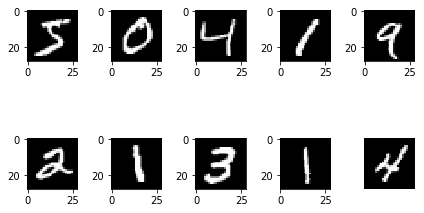

In [8]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

In [9]:
# the following is a simple function that returns accuracy classification score
from sklearn.metrics import accuracy_score
def accuracy(model,targets):
    outputs=np.argmax(model.o_output,axis=1)
    targets_numbers=np.argmax(targets,axis=1)
    return accuracy_score(outputs,targets_numbers)*100

Now we'll write a simple function that creates and trains a neural network. It takes the following parameters: number of epochs, number of hidden neurons, number of learning rates to try, training data and test data.

In [22]:
def training(epochs, neurons, lr_list, train_data,test_data):
    start=time()
    
    inputs=train_data[0]
    targets=train_data[1]

    
    
    for learning_rate in lr_list:
        start=time()
        nn_model= NeuralNetwork(input_layer_size=784, hidden_layer_size=neurons, output_layer_size=10, transfer_f=sigmoid, transfer_df=dsigmoid)
        acc=[]
        for k in range(epochs):
            nn_model.feedforward(inputs)
            nn_model.backpropagate(targets, learning_rate)
            outputs=np.argmax(nn_model.o_output,axis=1)
            acc.append(accuracy(nn_model, targets))
            #acc_test.append(accuracy(nm_model, targets))
        print("the training time is:", time() - start, "s")
        print('The hyper-parameters used are: learning rate=', learning_rate, ' number of epochs=',epochs,', number of hidden neurons=',neurons)
        #print('The time needed to train the network is:',time()-start,'s')
        print('The final accuracy on training data is:',acc[-1],'%')
        nn_model.feedforward(test_data[0])
        acc_test=accuracy(nn_model, test_data[1])
        print('\nThe final accuracy on test data is:',acc_test,'%','\n\n')
        plt.figure()
        plt.plot(acc)
        plt.title('Accuracy on training data with learning rate=' + str(learning_rate))
        

Now we'll go for it, we'll train and test a artificial neural network!

<div class="alert alert-block alert-info">
We'll start we a configuration of 300 epochs, 30 hidden neurons and multiple learning rates</div>

the training time is: 12.91495156288147 s
The hyper-parameters used are: learning rate= 0.1  number of epochs= 300 , number of hidden neurons= 30
The final accuracy on training data is: 21.7 %

The final accuracy on test data is: 20.82 % 


the training time is: 12.897900342941284 s
The hyper-parameters used are: learning rate= 1.0  number of epochs= 300 , number of hidden neurons= 30
The final accuracy on training data is: 88.4 %

The final accuracy on test data is: 83.8 % 


the training time is: 13.494840383529663 s
The hyper-parameters used are: learning rate= 5.0  number of epochs= 300 , number of hidden neurons= 30
The final accuracy on training data is: 42.8 %

The final accuracy on test data is: 40.57 % 


the training time is: 14.862424373626709 s
The hyper-parameters used are: learning rate= 10.0  number of epochs= 300 , number of hidden neurons= 30
The final accuracy on training data is: 11.700000000000001 %

The final accuracy on test data is: 10.290000000000001 % 




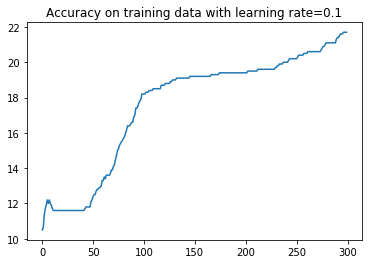

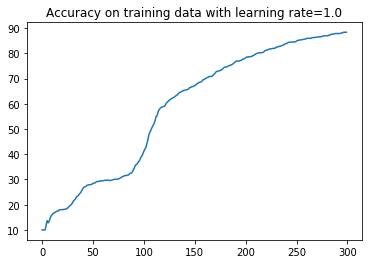

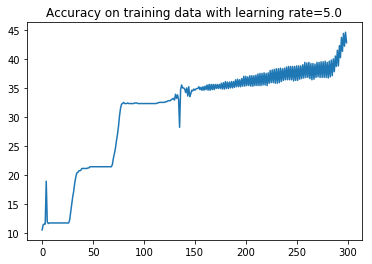

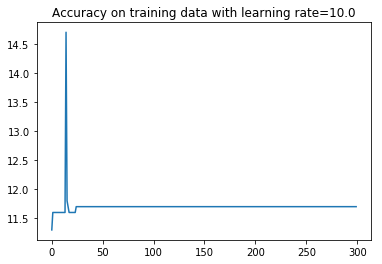

In [23]:
training(300, 30, [0.1,1.,5., 10.], small_training_data,test_data)

<div class="alert alert-block alert-info">
From the results above, the best learning rate is 1. It gave an accuracy of 83.8% on test data<br>
This learning rate is good enough to give good results by converging rapidly given this number of iterations. It's then a good trade off here between good results and computation time<br><br>
Son what we'll do next is, with a learning rate of 1, we'll train our network with 75 hidden neurons, then with 100 hidden neurons.
</div>

the training time is: 16.456557989120483 s
The hyper-parameters used are: learning rate= 1  number of epochs= 300 , number of hidden neurons= 75
The final accuracy on training data is: 90.9 %

The final accuracy on test data is: 84.96000000000001 % 




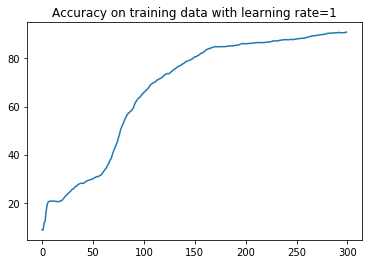

In [28]:
training(300, 75, [1], small_training_data,test_data)

the training time is: 14.40342926979065 s
The hyper-parameters used are: learning rate= 1  number of epochs= 300 , number of hidden neurons= 100
The final accuracy on training data is: 91.2 %

The final accuracy on test data is: 84.94 % 




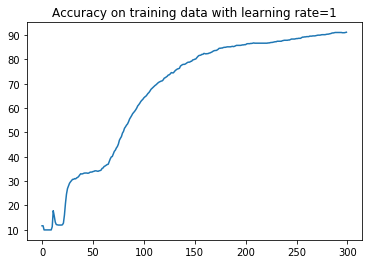

In [29]:
training(300, 100, [1], small_training_data,test_data)

<div class="alert alert-block alert-info">
The configuration with 75 gave slighlty better results than 30 hidden neurons, and almost the same results as 100 hidden neurons, so it's theone we'll keep. It seems like a good trade-off between underfitting (too little hidden neurons) and overfitting (too many hidden neurons).<br><br>
So now we will train our final artificial neural network on the full training data.<br>
We will use 300 epochs, 75 hidden neurons and a learning rate of 1.
</div>

the training time is: 691.8630530834198 s
The hyper-parameters used are: learning rate= 1  number of epochs= 300 , number of hidden neurons= 75
The final accuracy on training data is: 87.478 %

The final accuracy on test data is: 88.36 % 




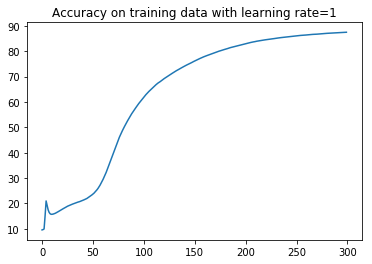

In [30]:
training(300, 75, [1], training_data,test_data)

<div class="alert alert-block alert-info">
As expected, after training our network on a larger dataset, we got a higher accuracy on test data.
</div>

<div class="alert alert-block alert-info">
Before getting done with ANNs, we will try one last thing.<br>
In classification problems, we usually replace the sigmoids in the output layer by a <strong>softmax</strong> function and the MSE loss by a <strong>cross-entropy</strong> loss.<br>
So we will do that here, and then retrain our neural net.<br>
We'll need to rewrite the feed forward, the back propagation and the training function.
</div>

In [31]:
class NeuralNetwork(NeuralNetwork):
    def feedforward_xe(self, inputs):
        
        # initialize arrays for activations
        self.u_hidden = np.zeros((len(inputs), self.hidden_layer_size-1))
        self.u_output = np.zeros((len(inputs), self.output_layer_size))

        # initialize arrays for outputs
        self.o_input = np.ones((len(inputs), self.input_layer_size))
        self.o_hidden = np.ones((len(inputs), self.hidden_layer_size))
        self.o_output = np.ones((len(inputs), self.output_layer_size))

        # initialize arrays for partial derivatives according to activations
        self.dE_du_hidden = np.zeros((len(inputs), self.hidden_layer_size-1))
        self.dE_du_output = np.zeros((len(inputs), self.output_layer_size))
        
        
            
        #output of the input layer which corresponds to the inputs (bias neuron = 1.0)
        self.o_input[:,:-1]=np.array(inputs)
        self.o_input[:,-1:]=1
        #activations of the hidden layer
        self.u_hidden=np.dot(self.o_input, self.W_input_to_hidden)
        #ouput of the hidden layer
        self.o_hidden[:,:-1]=self.transfer_f(self.u_hidden) #.reshape((1, len(self.transfer_f(self.u_hidden))))
        # set bias neuron in hidden layer to 1.0
        self.o_hidden[:, -1:]=1
        #activations of the output layer
        self.u_output=np.dot(self.o_hidden, self.W_hidden_to_output)
        
        #all the lines above are the same with the first feedforward function
        #output of the output layer using the softmax function
        self.o_output=softmax(self.u_output)



    def backpropagate_xe(self, targets, learning_rate=5.0):

            #derivative of the error with respect to the activation for the output layer
            self.dE_du_output=(self.o_output-targets)/len(targets)
            #derivative of the error with respect to the activation for the hidden layer 

            self.dE_du_hidden=self.transfer_df(self.u_hidden)*np.dot( self.dE_du_output, self.W_hidden_to_output[:-1,:].T )
            #self.dE_du_hidden=self.transfer_df(self.u_hidden)*np.dot( self.dE_du_output, self.W_hidden_to_output[:-1,:].T )
            # weight changes for the output layer
            self.W_hidden_to_output-=learning_rate*np.dot(self.o_hidden.T , self.dE_du_output)
            # weight changes for the hidden layer
            self.W_input_to_hidden-=learning_rate*np.dot(self.o_input.T,self.dE_du_hidden )

In [32]:
def training_xe(epochs, neurons, lr_list, train_data,test_data):
    start=time()
    
    inputs=train_data[0]
    targets=train_data[1]

    
    
    for learning_rate in lr_list:
        start=time()
        nn_model= NeuralNetwork(input_layer_size=784, hidden_layer_size=neurons, output_layer_size=10, transfer_f=sigmoid, transfer_df=dsigmoid)
        acc=[]
        for k in range(epochs):
            nn_model.feedforward_xe(inputs)
            nn_model.backpropagate_xe(targets, learning_rate)
            outputs=np.argmax(nn_model.o_output,axis=1)
            acc.append(accuracy(nn_model, targets))
            #acc_test.append(accuracy(nm_model, targets))
        plt.figure()
        plt.plot(acc)
        plt.title('Accuracy vs Iterations with learning rate=' + str(learning_rate))
        print("the training time is:", time() - start, "s")
        print('The hyper-parameters used are: number of epochs=',epochs,', number of hidden neurons=',neurons)
        #print('The time needed to train the network is:',time()-start,'s')
        print('The final accuracy on training data is:',acc[-1])
        nn_model.feedforward(test_data[0])
        acc_test=accuracy(nn_model, test_data[1])
        print('\nThe final accuracy on test data is:',acc_test,'\n')

The hyper-parameters used are: number of epochs= 300 , number of hidden neurons= 75
The final accuracy on training data is: 91.512

The final accuracy on test data is: 91.74 



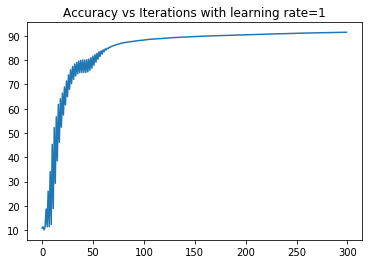

In [19]:
training_xe(300, 75, [1], training_data,test_data)

<div class="alert alert-block alert-info">
All things being equal, when using the cross-entropy loss with the softmax function, we obtain an accuracy of 91.74% which is much higher than the 88.36% we got with the MSE loss. <br>
The softmax function reacts to low stimulation of our neural net with rather uniform distribution and to high stimulation (ie. large numbers) with probabilities close to 0 and 1. It tries to minimize the cross-entropy between the predictions and the truth, that's why it gives better results than the MSE loss.</div>

# Part 2: Convolutional Neural Networks

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
# To ignore warning
import warnings
warnings.filterwarnings("ignore")

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels


print("Image Shape: {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

epsilon = 1e-10 # this is a parameter you will use later

<img src="Lenet5.png" alt="Drawing" style="width: 800px;"/>
<center><span>Figure 1: Lenet 5 Architecture</span></center>

<b>About CNNs:</b><br>
In this the second part of our project, we used convolutional neural networks. Since the layers in a CNN are different, it won’t really be interesting to write all the code by hand, that’s why we used tensorflow. CNNs are basically combinations of convolutional layers, activation layers, subsampling layers and fully connected layers.  In our case, the output is a vector containing 10 probabilities.<br>
A convolutional layers applies a set of filters to the input image, each of these filters can be thought of as feature identifiers. The filters on the first layers detect very basic features likes edges or curves, but the deeper we go in the network, the more specific these features become.<br>
Subsampling layers are used to reduce the dimension.<br>
Fully connected layers role is to reshape the output in the correct wanted shape.<br><br>

The figure above of this CNN shows predefined architecture called Lenet 5. It’s good for image classification.

The LeNet architecture takes a 28x28xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case. Its architecture is exactly the following:

<b>Layer 1 - Convolution (5x5)</b>: The output shape should be 28x28x6. <b>Activation</b>: ReLU. <b>MaxPooling</b>: The output shape should be 14x14x6.

<b>Layer 2 - Convolution (5x5)</b>: The output shape should be 10x10x16. <b>Activation</b>: ReLU. <b>MaxPooling</b>: The output shape should be 5x5x16.

<b>Flatten</b>: Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. You may need to use tf.reshape.

<b>Layer 3 - Fully Connected</b>: This should have 120 outputs. <b>Activation</b>: ReLU.

<b>Layer 4 - Fully Connected</b>: This should have 84 outputs. <b>Activation</b>: ReLU.

<b>Layer 5 - Fully Connected</b>: This should have 10 outputs. <b>Activation</b>: softmax.

<div class="alert alert-block alert-info">
Time to implement this using TensorFlow!
</div>

In [3]:
# Functions for weigths and bias initilization 
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0., shape=shape)
    return tf.Variable(initial)



In [4]:
def LeNet5_Model(image, dropout=False):    
    
    input_layer = tf.reshape(image, shape=[-1, 28, 28, 1])
    #creating the filter for the first layer
    conv1_f=weight_variable([5,5,1,6])
    #initializing the bias
    conv1_b=bias_variable([6])
    #Layer 1 Convolution
    conv1=tf.nn.conv2d(input_layer,filter=conv1_f, strides=[1,1,1,1], padding='SAME')
    #Activation for Layer 1
    activ1=tf.nn.relu(conv1 + conv1_b)
    #Layer 1 Max pooling
    pool1=tf.nn.max_pool(activ1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    #creating the filter for the second layer
    conv2_f=weight_variable([5,5,6,16])
    #initializing the bias
    conv2_b=bias_variable([16])
    #Layer 2 Convolution
    conv2=tf.nn.conv2d(pool1,filter=conv2_f, strides=[1,1,1,1], padding='VALID')
    #Activation
    activ2=tf.nn.relu(conv2 + conv2_b)
    #Layer 2 Max pooling
    pool2=tf.nn.max_pool(activ2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    #print("pool2 shape", pool2.shape)
    
    #compute dropout if dropout=True
    if dropout: 
        pool2= tf.nn.dropout(pool2, keep_prob = 0.5)
    
    #Fully connected 1 (Layer 3) initializing the weights
    fc1_W = weight_variable([5*5*16, 120])
    #Fully connected 1 (Layer 3) initializing the bias
    fc1_b = bias_variable([120])
    #Fully connected 1 (Layer 3) - activation
    fc1_h = tf.nn.relu(tf.matmul(tf.reshape(pool2, shape=[-1, 5*5*16]), fc1_W) + fc1_b)

    #Fully connected 2 (Layer 4) initializing the weights
    fc2_W = weight_variable([120, 84])
    #Fully connected 2 (Layer 4) initializing the bias
    fc2_b = bias_variable([84])
    #Fully connected 2 (Layer 4) - activation
    fc2_h = tf.nn.relu(tf.matmul(fc1_h, fc2_W) + fc2_b)
    
    #Fully connected 3 (Layer 5) initializing the weights
    fc3_W = weight_variable([84, 10])
    #Fully connected 3 (Layer 5) initializing the bias
    fc3_b = bias_variable([10])
    #Fully connected 3 (Layer 5) - activation
    fc3_h = tf.matmul(fc2_h, fc3_W) + fc3_b
    
    return fc3_h

<div class="alert alert-block alert-info">
Now just for fun, and to have a better understanding of our model, let's compute its the number of parameters:</div>

<div class="alert alert-block alert-success">

The number of parameters is:  <b>60000</b> .<br>
Layer C1:  156 =  (5∗5+1)∗6  
Layer S2:  12  = 6∗2  
Layer C3:  1516 =  5∗5∗(6∗3+9∗4+1∗6)+16  
Layer S4:  32 =  16∗2  
Layer C5:  48120 =  ((5∗5∗16+1)∗120) <br>
Layer F6:  10164 =  ((120+1)∗84) <br><br>
NB: The  +1  in each formula is due to the bias.
</div>

<div class="alert alert-block alert-info">

Let's define our model, its accuracy and the loss function.
</div>

In [5]:
tf.reset_default_graph() # reset the default graph before defining a new model

# Parameters
learning_rate = 0.001
training_epochs = 40
batch_size = 128
logs_path = 'MNIST_figures/'

display_step = 10

# Model, loss function and accuracy
# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, shape=[None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

<div class="alert alert-block alert-info">

Let's define the evalution function, it returns the accuracy </div>

In [6]:
def evaluate(logits, labels):
    # logits will be the outputs of your model, labels will be one-hot vectors corresponding to the actual labels
    # logits and labels are numpy arrays
    # this function should return the accuracy of your model
   
    with tf.name_scope('Accuracy'):
        # Accuracy
        acc = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
        acc = tf.reduce_mean(tf.cast(acc, tf.float32))
    return acc

In [7]:
# Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    pred = LeNet5_Model(x, dropout=False) # LeNet5 Model
    #print("X shape", x.shape)
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))
with tf.name_scope('SGD'):
    # Gradient Descent optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# Accuracy   
acc=evaluate(pred, y)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



<div class="alert alert-block alert-info">
Now we implement the training pipeline and run the training data through it to train the model:
<ul>
<li>Before each epoch, shuffle the training set.<br>
<li>Print the loss per mini batch and the training/validation accuracy per epoch. (Display results every 100 epochs)<br>
<li>Save the model after training<br>
<li>Print after training the final testing accuracy
</ul><br>
We will use the Gradient Descent Optimizer</div>

In [9]:
# Initializing the variables
init = tf.global_variables_initializer()
# Create a summary to monitor cost tensor
tf.summary.scalar("Loss_LeNet-5_SGD", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("Accuracy_LeNet-5_SGD", acc)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()


def train(init, sess, logs_path, n_epochs, batch_size, optimizer, cost, merged_summary_op):
    
    # optimizer and cost are the same kinds of objects as in Section 1
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size, shuffle=(i==0))

                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                         feed_dict={x: batch_xs, y: batch_ys})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch
            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost))
            print("Accuracy for Epoch",(epoch+1), 'is:', acc.eval({x: mnist.test.images, y: mnist.test.labels}))


        print("Optimization Finished!")
        summary_writer.flush()
    
        # Print the accuracy on testing data
        print("Final accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))

start=time.time()
with tf.Session() as sess:
    train(init, sess, logs_path, training_epochs, batch_size, optimizer, cost, merged_summary_op)
end=time.time()
print("The execution time using the Gradient Descent optimizer is", end-start, "s")

Accuracy for Epoch 1 is: 0.1403
Accuracy for Epoch 2 is: 0.1727
Accuracy for Epoch 3 is: 0.24
Accuracy for Epoch 4 is: 0.3855
Accuracy for Epoch 5 is: 0.6047
Accuracy for Epoch 6 is: 0.7832
Accuracy for Epoch 7 is: 0.8315
Accuracy for Epoch 8 is: 0.8558
Accuracy for Epoch 9 is: 0.8731
Epoch:  10   =====> Loss= 0.455573776
Accuracy for Epoch 10 is: 0.8861
Accuracy for Epoch 11 is: 0.8932
Accuracy for Epoch 12 is: 0.9009
Accuracy for Epoch 13 is: 0.9053
Accuracy for Epoch 14 is: 0.9097
Accuracy for Epoch 15 is: 0.914
Accuracy for Epoch 16 is: 0.9167
Accuracy for Epoch 17 is: 0.9198
Accuracy for Epoch 18 is: 0.9221
Accuracy for Epoch 19 is: 0.9261
Epoch:  20   =====> Loss= 0.271318387
Accuracy for Epoch 20 is: 0.9282
Accuracy for Epoch 21 is: 0.9305
Accuracy for Epoch 22 is: 0.9325
Accuracy for Epoch 23 is: 0.9348
Accuracy for Epoch 24 is: 0.9355
Accuracy for Epoch 25 is: 0.9377
Accuracy for Epoch 26 is: 0.9404
Accuracy for Epoch 27 is: 0.9415
Accuracy for Epoch 28 is: 0.9434
Accuracy for

<div class="alert alert-block alert-info">

Now we retrain out network, not with gradient descent optimizer, but with <b>Adam Optimizer</b> this time.<br><br>
Adam Optimizer uses Kingma and Ba's Adam algorithm to control the learning rate. Adam offers several advantages over the simple Gradient Descent Optimizer. Foremost is that it uses moving averages of the parameters (momentum); Simply put, this enables Adam to use a larger effective step size, and the algorithm will converge to this step size without fine tuning.<br><br>
Since it requires more computation, it might require more time in general, but in our case the dataset size is not that big, sothe difference between the two optimizers training time is negligible but Adam Optimizer accuracy is much better. <br>Therefore, it should be better to use it.


</div>

In [11]:
tf.reset_default_graph()
# Parameters
learning_rate = 0.001
training_epochs = 40
batch_size = 128
logs_path = 'Adam_optimizer/'

display_step = 1

# Model, loss function and accuracy
# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, shape=[None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

# Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    pred = LeNet5_Model(x) # LeNet5 Model
    #print("X shape", x.shape)
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))
with tf.name_scope('Adam'):
    # Adam optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
# Accuracy   
acc=evaluate(pred, y)

# Initializing the variables
init = tf.global_variables_initializer()
# Create a summary to monitor cost tensor
tf.summary.scalar("Loss_LeNet-5_Adam", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("Accuracy_LeNet-5_Adam", acc)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()
start=time.time()
with tf.Session() as sess:
    train(init, sess, logs_path, training_epochs, batch_size, optimizer, cost, merged_summary_op)
end=time.time()
print("The execution time using the Adam optimizer is", end-start, "s")

Epoch:  01   =====> Loss= 0.331359965
Accuracy for Epoch 1 is: 0.9691
Epoch:  02   =====> Loss= 0.093254852
Accuracy for Epoch 2 is: 0.9788
Epoch:  03   =====> Loss= 0.066139644
Accuracy for Epoch 3 is: 0.983
Epoch:  04   =====> Loss= 0.052111943
Accuracy for Epoch 4 is: 0.9851
Epoch:  05   =====> Loss= 0.043380331
Accuracy for Epoch 5 is: 0.987
Epoch:  06   =====> Loss= 0.036639620
Accuracy for Epoch 6 is: 0.9858
Epoch:  07   =====> Loss= 0.030749412
Accuracy for Epoch 7 is: 0.9864
Epoch:  08   =====> Loss= 0.027192664
Accuracy for Epoch 8 is: 0.9849
Epoch:  09   =====> Loss= 0.023345638
Accuracy for Epoch 9 is: 0.982
Epoch:  10   =====> Loss= 0.020711382
Accuracy for Epoch 10 is: 0.9841
Epoch:  11   =====> Loss= 0.019729087
Accuracy for Epoch 11 is: 0.9847
Epoch:  12   =====> Loss= 0.016154980
Accuracy for Epoch 12 is: 0.9831
Epoch:  13   =====> Loss= 0.015759520
Accuracy for Epoch 13 is: 0.9845
Epoch:  14   =====> Loss= 0.014073682
Accuracy for Epoch 14 is: 0.9875
Epoch:  15   =====

<div class="alert alert-block alert-info">
From the first iteration (epoch), we reached an accuracy of $96.91$% ! Which is amazing, and it's due to the fact that during each iteration, many parameter updates are done on mini batches of the data set, allowing Adam Optimizer to control the learning rate after each update.<br>
The final accuracy is $98.62$%, which is very good, but not good enough for us. <br><br>That's why, to help improve the results of our model, we will add one last optimization: <b> dropout regularization</b> 
<br> It works on the concept: <b> Learn less to learn better</b><br>
We use tf.nn.dropout to randomly drop units from the neural network during training before the fully connected layers. This prevents units from co-adapting too much. This significantly reduces overfitting and gives major improvements over other regularization methods.
</div>

We add dropout before the first fully connected layer with a keeping probability of $0.5$.

In [12]:
def LeNet5_Model_Dropout(image):    
    #computes dropout before the first fully connected layer
    LeNet5_Model(image, dropout=True)

tf.reset_default_graph()

# Parameters
learning_rate = 0.001
training_epochs = 60
batch_size = 128
logs_path = 'Adam_drop/'

display_step = 1

# Model, loss function and accuracy
# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, shape=[None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

# Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    pred = LeNet5_Model(x) # LeNet5 Model
    #print("X shape", x.shape)
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))
with tf.name_scope('AdamD'):
    # Adam optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
# Accuracy   
acc=evaluate(pred, y)

# Initializing the variables
init = tf.global_variables_initializer()
# Create a summary to monitor cost tensor
tf.summary.scalar("Loss_LeNet-5_AdamD", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("Accuracy_LeNet-5_AdamD", acc)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

with tf.Session() as sess:
    train(init, sess, logs_path, training_epochs, batch_size, optimizer, cost, merged_summary_op)

Epoch:  01   =====> Loss= 0.355113132
Accuracy for Epoch 1 is: 0.9723
Epoch:  02   =====> Loss= 0.087707463
Accuracy for Epoch 2 is: 0.9817
Epoch:  03   =====> Loss= 0.061158387
Accuracy for Epoch 3 is: 0.985
Epoch:  04   =====> Loss= 0.048097268
Accuracy for Epoch 4 is: 0.9864
Epoch:  05   =====> Loss= 0.039355494
Accuracy for Epoch 5 is: 0.9871
Epoch:  06   =====> Loss= 0.033055457
Accuracy for Epoch 6 is: 0.9884
Epoch:  07   =====> Loss= 0.028234790
Accuracy for Epoch 7 is: 0.9891
Epoch:  08   =====> Loss= 0.023703151
Accuracy for Epoch 8 is: 0.9888
Epoch:  09   =====> Loss= 0.020063447
Accuracy for Epoch 9 is: 0.9884
Epoch:  10   =====> Loss= 0.018048270
Accuracy for Epoch 10 is: 0.9862
Epoch:  11   =====> Loss= 0.016236878
Accuracy for Epoch 11 is: 0.9852
Epoch:  12   =====> Loss= 0.014429069
Accuracy for Epoch 12 is: 0.9872
Epoch:  13   =====> Loss= 0.013652794
Accuracy for Epoch 13 is: 0.9862
Epoch:  14   =====> Loss= 0.012506887
Accuracy for Epoch 14 is: 0.9877
Epoch:  15   ===

<div class="alert alert-block alert-info">
We can see from the result that dropout improves the performance of our neural networks from $98.62$% to $99.02$%.<br>
After a long series of tests and optimizations, we can finally say: <br><br><b>GOAL ACHIEVED</b>
<div>